In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
# Figure out how to import regularizers
###
from tensorflow.keras.regularizers import l2
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2020-07-09 10:10:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.28.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-07-09 10:10:35 (79.2 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [17]:
model = Sequential()
model.add(Embedding(total_words, 150, input_length=max_sequence_len-1))
model.add(LSTM(150, return_sequences=True))
model.add(Dropout(.2))
model.add(LSTM(100))
model.add(Dense(total_words//2, activation='relu', kernel_regularizer=l2(l=0.01)))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model.summary())


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 10, 150)           481650    
_________________________________________________________________
lstm_12 (LSTM)               (None, 10, 150)           180600    
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 150)           0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 100)               100400    
_________________________________________________________________
dense_10 (Dense)             (None, 1605)              162105    
_________________________________________________________________
dense_11 (Dense)             (None, 3211)              5156866   
Total params: 6,081,621
Trainable params: 6,081,621
Non-trainable params: 0
____________________________________________

In [22]:
 history = model.fit(predictors, label, epochs=200, verbose=1, steps_per_epoch=2)

Epoch 1/200
2/2 [==============================] - 0s 107ms/step - loss: 0.6095 - accuracy: 0.8606
Epoch 2/200
2/2 [==============================] - 0s 103ms/step - loss: 0.6061 - accuracy: 0.8612
Epoch 3/200
2/2 [==============================] - 0s 101ms/step - loss: 0.6118 - accuracy: 0.8602
Epoch 4/200
2/2 [==============================] - 0s 106ms/step - loss: 0.6095 - accuracy: 0.8636
Epoch 5/200
2/2 [==============================] - 0s 104ms/step - loss: 0.6140 - accuracy: 0.8606
Epoch 6/200
2/2 [==============================] - 0s 103ms/step - loss: 0.6055 - accuracy: 0.8642
Epoch 7/200
2/2 [==============================] - 0s 91ms/step - loss: 0.6077 - accuracy: 0.8636
Epoch 8/200
2/2 [==============================] - 0s 105ms/step - loss: 0.6035 - accuracy: 0.8620
Epoch 9/200
2/2 [==============================] - 0s 105ms/step - loss: 0.6058 - accuracy: 0.8637
Epoch 10/200
2/2 [==============================] - 0s 104ms/step - loss: 0.6098 - accuracy: 0.8606
Epoch 11/2

Loss: .6005

Accuracy: 86.37

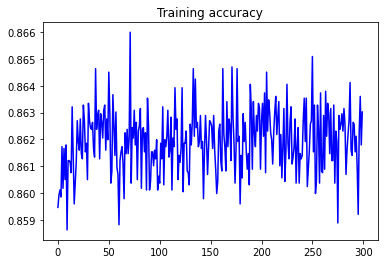

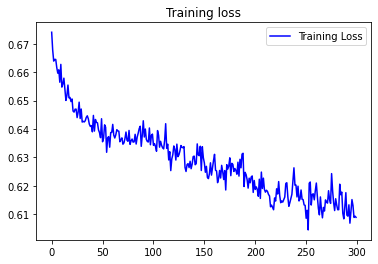

In [21]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [23]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope to foul harmful part rehearse thee to hate' hate' thee from reason one view in me abuse me remains 'this feature broke and his lease fix'd from thee thrall untrue thine vices got leave me know pursuing call clears thee would have supposed dead ' must hate' constancy show so bold 'this end part doth bear lie quite red than unjust remain gone good blot the eyes well hate' constancy wires self loving nerves bring in they maintain dispense find misuse fortune kept gone so alone to more decay assured eyes say when they do not it large abuse me
